<a href="https://colab.research.google.com/github/skywalker0803r/c620/blob/main/notebook/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt

# load

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
root = '/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/'

icg_df = pd.read_csv(root+'icg_train.csv',index_col=0)

t651_df = pd.read_csv(root+'t651_train.csv',index_col=0).dropna(axis=0)
idx = t651_df.index

c620_df = pd.read_csv(root+'c620_train.csv',index_col=0).loc[idx]
c620_mb = pd.read_csv(root+'c620_mbcheck.csv',index_col=0).loc[idx]

c660_df = pd.read_csv(root+'c660_train.csv',index_col=0).loc[idx]
c660_mb = pd.read_csv(root+'c660_mbcheck.csv',index_col=0).loc[idx]

c670_df = pd.read_csv(root+'c670_train.csv',index_col=0).loc[idx]
c670_mb = pd.read_csv(root+'c670_mbcheck.csv',index_col=0).loc[idx]

In [4]:
root = '/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/'
icg_col = joblib.load(root+'icg_col_names.pkl')
c620_col = joblib.load(root+'c620_col_names.pkl')
c660_col = joblib.load(root+'c660_col_names.pkl')
c670_col = joblib.load(root+'c670_col_names.pkl')
t651_col = joblib.load(root+'t651_col_names.pkl')

# check c620&t651 -> c660

In [5]:
t651_mf = t651_df[t651_col['MFR']]
c620_mf = c620_mb.iloc[:,[3]]
total = t651_mf.values + c620_mf.values
t651_mf = t651_mf/total
c620_mf = c620_mf/total
t651_x41 = t651_df[t651_col['x41']]
c620_w3 = c620_df[c620_col['sidedraw_x']]
c660_feed_pred = c620_w3.values*c620_mf.values + t651_x41.values*t651_mf.values
c660_feed_pred = pd.DataFrame(c660_feed_pred,index=idx,columns=c660_col['x41'])
c660_feed_pred.head(3)

,Combined Feed to Benzene Column C660_Detailed Composition_Hydrogen_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Methane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Propane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Butane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Pentane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Hexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Benzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Cyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Heptane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Water_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Methylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Toluene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Octane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylcyclopentane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_p-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_m-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_o-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Nonane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_i-Propylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-3-ethylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-4-ethylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,3,5-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-2-ethylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2,4-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_tert-Butylcyclohexane_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2,3-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_Indane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-4-n-propylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2-Diethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_5-Ethyl-m-xylene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,4-Diethylbenzene_wt%","Combined Feed to Benzene Column C660_Detailed Composition_1,2,3,5-Tetramethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_n-Pentylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Hexylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Nitrogen_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Oxygen_wt%
001-001,0.0,0.000175,0.011354,0.021681,0.014908,0.019511,0.030082,66.278216,0.02099,0.034398,0.0,0.014600,27.873568,0.028611,0.024798,0.020281,3.132133,0.632336,1.318028,0.365566,0.044484,1.951733e-08,0.098763,3.399222e-09,0.001142,0.001141,0.00223,0.00057,0.00057,0.00788,3.896395e-09,1.684247e-10,0.001555,0.000415,6.044997e-10,0.0,6.479632e-12,3.103609e-13,3.014521e-16,0.0,0.0
001-002,0.0,0.000175,0.011353,0.021678,0.014906,0.019510,0.030081,66.278232,0.02099,0.034399,0.0,0.014601,27.873554,0.028611,0.024798,0.020281,3.132134,0.632336,1.318029,0.365566,0.044484,1.951592e-08,0.098764,3.398967e-09,0.001142,0.001141,0.00223,0.00057,0.00057,0.00788,3.896085e-09,1.684114e-10,0.001555,0.000415,6.044514e-10,0.0,6.479096e-12,3.103352e-13,3.014266e-16,0.0,0.0
001-003,0.0,0.000175,0.011354,0.021680,0.014907,0.019510,0.030082,66.278226,0.02099,0.0

In [6]:
c660_feed = c660_df[c660_col['x41']]
c660_feed.head(3)

,Combined Feed to Benzene Column C660_Detailed Composition_Hydrogen_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Methane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Propane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Butane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Pentane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Hexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Benzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Cyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Heptane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Water_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Methylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Toluene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Octane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylcyclopentane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Ethylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_p-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_m-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_o-Xylene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Nonane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_i-Propylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylcyclohexane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Propylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-3-ethylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-4-ethylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,3,5-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-2-ethylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2,4-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_tert-Butylcyclohexane_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2,3-Trimethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_Indane_wt%,Combined Feed to Benzene Column C660_Detailed Composition_1-Methyl-4-n-propylbenzene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,2-Diethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_5-Ethyl-m-xylene_wt%,"Combined Feed to Benzene Column C660_Detailed Composition_1,4-Diethylbenzene_wt%","Combined Feed to Benzene Column C660_Detailed Composition_1,2,3,5-Tetramethylbenzene_wt%",Combined Feed to Benzene Column C660_Detailed Composition_n-Pentylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_n-Hexylbenzene_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Nitrogen_wt%,Combined Feed to Benzene Column C660_Detailed Composition_Oxygen_wt%
001-001,0.0,0.000175,0.011354,0.021681,0.014908,0.019511,0.030082,66.278221,0.02099,0.034398,0.0,0.014600,27.873569,0.028611,0.024798,0.020281,3.132133,0.632336,1.318029,0.365566,0.044484,1.951733e-08,0.098763,3.399222e-09,0.001142,0.001141,0.00223,0.00057,0.00057,0.00788,3.896395e-09,1.684246e-10,0.001555,0.000415,6.044996e-10,0.0,6.479631e-12,3.103609e-13,3.014521e-16,0.0,0.0
001-002,0.0,0.000175,0.011353,0.021678,0.014906,0.019510,0.030081,66.278244,0.02099,0.034399,0.0,0.014601,27.873554,0.028611,0.024798,0.020281,3.132135,0.632336,1.318029,0.365566,0.044484,1.951592e-08,0.098764,3.398968e-09,0.001142,0.001141,0.00223,0.00057,0.00057,0.00788,3.896086e-09,1.684114e-10,0.001555,0.000415,6.044514e-10,0.0,6.479096e-12,3.103352e-13,3.014266e-16,0.0,0.0
001-003,0.0,0.000175,0.011354,0.021680,0.014907,0.019510,0.030082,66.278236,0.02099,0.0

In [7]:
np.allclose(c660_feed.values,c660_feed_pred.values)

True

# check c620,c660 -> c670

In [8]:
c660_w4 = c660_df[c660_col['bottoms_x']]
c620_w4 = c620_df[c620_col['bottoms_x']]
Tray_43_mfr = c670_mb.loc[:,['Toluene Column C670 Operation_Feed Properties \n@ Tray 43_Mass Flow Rate_ton/hr']]
Tray_54_mfr = c670_mb.loc[:,['Toluene Column C670 Operation_Feed Properties \n@ Tray 54_Mass Flow Rate_ton/hr']]
total = Tray_43_mfr.values + Tray_54_mfr.values
Tray_43_mfr = Tray_43_mfr/total
Tray_54_mfr = Tray_54_mfr/total
combined_pred = c660_w4.values*Tray_43_mfr.values + c620_w4.values*Tray_54_mfr.values
combined_pred = pd.DataFrame(combined_pred,index=idx,columns=c670_col['combined'])
combined_pred.head(3)

,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Hydrogen_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Methane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Propane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Butane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Pentane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Hexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Benzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Cyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Heptane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Water_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Methylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Toluene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Octane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylcyclopentane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_p-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_m-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_o-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Nonane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_i-Propylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-3-ethylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-4-ethylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,3,5-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-2-ethylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2,4-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_tert-Butylcyclohexane_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2,3-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Indane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-4-n-propylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2-Diethylbenzene_wt%",Tol

In [9]:
combined = c670_df[c670_col['combined']]
combined.head(3)

,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Hydrogen_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Methane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Propane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Butane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Pentane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Hexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Benzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Cyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Heptane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Water_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Methylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Toluene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Octane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylcyclopentane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Ethylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_p-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_m-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_o-Xylene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Nonane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_i-Propylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylcyclohexane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_n-Propylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-3-ethylbenzene_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-4-ethylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,3,5-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-2-ethylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2,4-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_tert-Butylcyclohexane_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2,3-Trimethylbenzene_wt%",Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_Indane_wt%,Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1-Methyl-4-n-propylbenzene_wt%,"Toluene Column C670 Operation_Combined Feed to Toluene Column C670 : Detailed weight % Composition_1,2-Diethylbenzene_wt%",Tol

In [10]:
np.allclose(combined_pred.values,combined.values)

True

# bf(c670混參比例) 41*2 check

# 修改前

In [11]:
np.allclose(c670_df[c670_col['upper_bf']].values+c670_df[c670_col['lower_bf']].values,1.0)

True

修改欄位數量: 24
True
(15547, 41) (15547, 41) (15547, 41) (15547, 41)
False


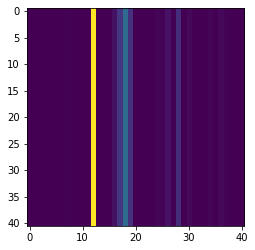

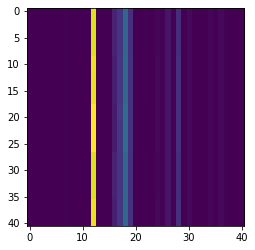

In [12]:
# 根據條件修改值
a = c670_df[c670_col['upper_bf']+c670_col['lower_bf']]
紫色零點零欄位 = a[a==0.0].dropna(axis=1).columns.tolist()
紫色零點一欄位 = a[a==0.1].dropna(axis=1).columns.tolist()
紫色零點九欄位 = a[a==0.9].dropna(axis=1).columns.tolist()
紫色一點零欄位 = a[a==1.0].dropna(axis=1).columns.tolist()
print('修改欄位數量:',len(紫色零點零欄位+紫色零點一欄位+紫色零點九欄位+紫色一點零欄位))
c670_df.loc[:,紫色零點零欄位] = 0.0001 
c670_df.loc[:,紫色零點一欄位] = 0.0001 
c670_df.loc[:,紫色零點九欄位] = 0.9999
c670_df.loc[:,紫色一點零欄位] = 0.9999
c670_df[紫色零點零欄位+紫色零點一欄位+紫色零點九欄位+紫色一點零欄位].head()
index_0001 = 紫色零點零欄位+紫色零點一欄位
index_9999 = 紫色零點九欄位+紫色一點零欄位

# 確認質量平衡
print(np.allclose(c670_df[c670_col['upper_bf']].values+c670_df[c670_col['lower_bf']].values,1.0))

# 用bf轉換成combined
x1 = c670_df.loc[idx,c670_col['xTray43']].values
x2 = c670_df.loc[idx,c670_col['xTray54']].values
bf1 = c670_df.loc[idx,c670_col['upper_bf']].values
bf2 = c670_df.loc[idx,c670_col['lower_bf']].values
print(x1.shape,x2.shape,bf1.shape,bf2.shape)
combined_real = c670_df.loc[idx,c670_col['combined']].values
combined_pred = x1*bf1 + x2*bf2
print(np.allclose(combined_real,combined_pred))
plt.imshow(combined_real[:41])
plt.show()
plt.imshow(combined_pred[:41])

# check massblance

In [13]:
np.allclose(c620_mb.iloc[:,0].values,c620_mb.iloc[:,1:].sum(axis=1).values),\
np.allclose(c660_mb.iloc[:,0].values,c660_mb.iloc[:,1:].sum(axis=1).values),\
np.allclose(c670_mb.iloc[:,[0,1]].sum(axis=1).values,c670_mb.iloc[:,[2,3]].sum(axis=1).values)

(True, True, True)

In [14]:
def check_massblance(df,mb,c,name):
  if (name == 'c620') or (name == 'c660'):
    feed = df[c['x41']]*mb.iloc[:,0].values.reshape(-1,1)
    wt1 = df[c['vent_gas_x']]*mb.iloc[:,1].values.reshape(-1,1)
    wt2 = df[c['distillate_x']]*mb.iloc[:,2].values.reshape(-1,1)
    wt3 = df[c['sidedraw_x']]*mb.iloc[:,3].values.reshape(-1,1)
    wt4 = df[c['bottoms_x']]*mb.iloc[:,4].values.reshape(-1,1)
    a = feed.values
    b = wt1.values+wt2.values+wt3.values+wt4.values
    print(np.allclose(a,b,atol=2e-2))
    print('mean error:',np.abs(a-b).mean())
    return pd.DataFrame(a),pd.DataFrame(b)
  elif name == 'c670':
    feed1 = df[c['xTray43']]*mb.loc[:,'Toluene Column C670 Operation_Feed Properties \n@ Tray 43_Mass Flow Rate_ton/hr'].values.reshape(-1,1)
    feed2 = df[c['xTray54']]*mb.loc[:,'Toluene Column C670 Operation_Feed Properties \n@ Tray 54_Mass Flow Rate_ton/hr'].values.reshape(-1,1)
    wt1 = df[c['distillate_x']]*mb.iloc[:,2].values.reshape(-1,1)
    wt2 = df[c['bottoms_x']]*mb.iloc[:,3].values.reshape(-1,1)
    a = feed1.values+feed2.values
    b = wt1.values+wt2.values
    print(np.allclose(a,b,atol=2e-2))
    print('mean error:',np.abs(a-b).mean())
    return pd.DataFrame(a),pd.DataFrame(b)

True
mean error: 6.271399251612663e-05


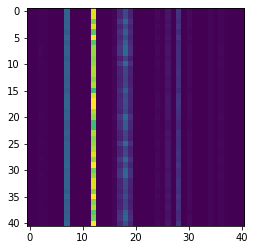

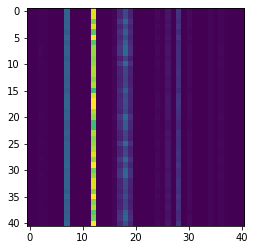

In [15]:
a,b = check_massblance(c620_df,c620_mb,c620_col,'c620')
idx = a.sample(41).index
plt.imshow(a.loc[idx].values)
plt.show()
plt.imshow(b.loc[idx].values)

In [16]:
a.loc[idx].values,b.loc[idx].values

(array([[ 0.        ,  3.2483043 , 78.77138216, ..., 24.52469668,
          0.        ,  0.        ],
        [ 0.        ,  3.24830459, 78.77138916, ..., 24.52469886,
          0.        ,  0.        ],
        [ 0.        ,  4.04793601, 97.79812586, ..., 18.45858841,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  3.76802653, 91.0355229 , ..., 17.18220033,
          0.        ,  0.        ],
        [ 0.        ,  4.0479342 , 97.79807179, ..., 18.45857757,
          0.        ,  0.        ],
        [ 0.        ,  3.45564235, 83.79931747, ..., 26.09009805,
          0.        ,  0.        ]]),
 array([[ 0.        ,  3.24830406, 78.77136993, ..., 24.52469577,
          0.        ,  0.        ],
        [ 0.        ,  3.24830446, 78.77139145, ..., 24.52469227,
          0.        ,  0.        ],
        [ 0.        ,  4.04793672, 97.79814502, ..., 18.45859398,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  3.76802623, 91.03551803, ..., 1

True
mean error: 2.9024358135451845e-05


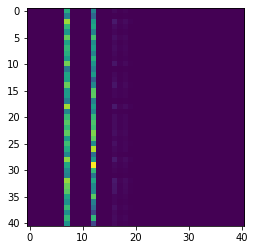

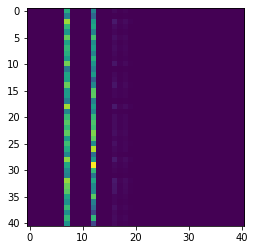

In [17]:
a,b = check_massblance(c660_df,c660_mb,c660_col,'c660')
idx = a.sample(41).index
plt.imshow(a.loc[idx].values)
plt.show()
plt.imshow(b.loc[idx].values)

In [18]:
a.loc[idx].values,b.loc[idx].values

(array([[0.00000000e+00, 1.12550265e-02, 7.28368743e-01, ...,
         1.90448472e-14, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.06931787e-02, 6.91968211e-01, ...,
         1.76720783e-14, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 7.56268073e-03, 4.90367078e-01, ...,
         1.95514152e-14, 0.00000000e+00, 0.00000000e+00],
        ...,
        [0.00000000e+00, 9.25339212e-03, 5.98721301e-01, ...,
         1.57924840e-14, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.42681392e-02, 9.27267939e-01, ...,
         4.26621273e-13, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.00624645e-02, 6.51157832e-01, ...,
         1.71311003e-14, 0.00000000e+00, 0.00000000e+00]]),
 array([[0.00000000e+00, 1.12550271e-02, 7.28368822e-01, ...,
         1.90448498e-14, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.06931781e-02, 6.91968297e-01, ...,
         1.76720808e-14, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 

True
mean error: 5.118631404322684e-05


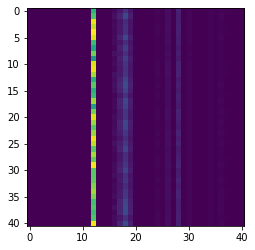

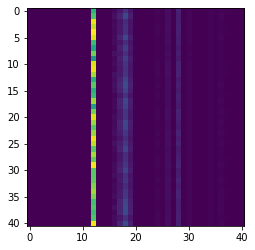

In [19]:
a,b = check_massblance(c670_df,c670_mb,c670_col,'c670')
idx = a.sample(41).index
plt.imshow(a.loc[idx].values)
plt.show()
plt.imshow(b.loc[idx].values)

In [20]:
a.loc[idx].values,b.loc[idx].values

(array([[ 0.        ,  0.        ,  0.        , ..., 22.82883973,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., 18.45858785,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., 21.26344545,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., 19.6367995 ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., 22.84336877,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., 19.63679717,
          0.        ,  0.        ]]),
 array([[ 0.        ,  0.        ,  0.        , ..., 22.82884396,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., 18.45859023,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., 21.26344018,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., 1

# 用 fna,xna,s_vent,s_dist,s_side,s_bot 算 f_vent,f_dist,f_side,f_bot

In [21]:
fna = c620_df['Tatoray Stripper C620 Operation_Feed Properties_Mass Flow Rate_ton/hr'].values.reshape(-1,1)
xna = c620_df.filter(regex='Combined Feed to Tatoray Stripper C620_Detailed Composition').iloc[:,:41].values
s_vent = c620_df.filter(regex='Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas').iloc[:,:41].values
s_dist = c620_df.filter(regex='Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Distillate').iloc[:,:41].values
s_side = c620_df.filter(regex='Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Sidedraw').iloc[:,:41].values
s_bot = c620_df.filter(regex='Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms').iloc[:,:41].values
f_vent = c620_df['Tatoray Stripper C620 Operation_Vent Gas Production Rate and Composition_Mass Flow Rate_ton/hr'].values
f_dist = c620_df['Tatoray Stripper C620 Operation_Distillate Production Rate and Composition_Mass Flow Rate_ton/hr'].values
f_side = c620_df['Tatoray Stripper C620 Operation_Sidedraw Production Rate and Composition_Mass Flow Rate_ton/hr'].values
f_bot = c620_df['Tatoray Stripper C620 Operation_Bottoms Production Rate and Composition_Mass Flow Rate_ton/hr'].values
print(np.allclose(np.sum(fna*xna*s_vent*0.01,axis=1),f_vent))
print(np.allclose(np.sum(fna*xna*s_dist*0.01,axis=1),f_dist))
print(np.allclose(np.sum(fna*xna*s_side*0.01,axis=1),f_side))
print(np.allclose(np.sum(fna*xna*s_bot*0.01,axis=1),f_bot))

True
True
True
True


# 用 wt 和 mass_flow 算 BF

In [22]:
c670_df.filter(regex='Flow Rate_ton').head()

,Combined Feed to Toluene Column C670 @ Tray 43_Flow Rate_Mass Flow Rate_ton/hr,Feed to Toluene Column C670 @ Tray 54_Flow Rate_Mass Flow Rate_ton/hr,Toluene Column C670 Operation_Feed Properties \n@ Tray 43_Mass Flow Rate_ton/hr,Toluene Column C670 Operation_Feed Properties \n@ Tray 54_Mass Flow Rate_ton/hr,Toluene Column C670 Operation_Distillate Production Rate and Composition_Mass Flow Rate_ton/hr,Toluene Column C670 Operation_Bottoms Production Rate and Composition_Mass Flow Rate_ton/hr
001-001,18.150902,124.981539,18.150902,124.981539,72.607789,70.524656
001-002,18.151391,124.981555,18.151391,124.981555,72.608289,70.524656
001-003,18.151730,124.981555,18.151730,124.981555,72.608625,70.524656
001-004,18.118328,125.012984,18.118328,125.012984,72.606664,70.524656
001-005,18.118820,125.012984,18.118820,125.012984,72.607156,70.524656


In [23]:
c620_bot_x = c620_df[c620_col['bottoms_x']].values
c660_bot_x = c660_df[c660_col['bottoms_x']].values
c620_mf_bot = c620_mb.loc[:,'Tatoray Stripper C620 Operation_Bottoms Production Rate and Composition_Mass Flow Rate_ton/hr'].values.reshape(-1,1)
c660_mf_bot = c660_mb.loc[:,'Benzene Column C660 Operation_Bottoms Production Rate and Composition_Mass Flow Rate_ton/hr'].values.reshape(-1,1)

a = (c620_bot_x*c620_mf_bot)/(c620_bot_x*c620_mf_bot+c660_bot_x*c660_mf_bot)
a = pd.DataFrame(a,columns=c670_col['lower_bf'])
a[list(set(index_9999)&set(a.columns))] = 0.9999
a[list(set(index_0001)&set(a.columns))] = 0.0001

b = 1-a.values
b = pd.DataFrame(b,columns=c670_col['upper_bf'])

print(np.allclose(a,c670_df[c670_col['lower_bf']].values))
print(np.allclose(b,c670_df[c670_col['upper_bf']].values))

True
True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [24]:
joblib.dump(index_9999,'/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/index_9999.pkl')
joblib.dump(index_0001,'/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/index_0001.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/index_0001.pkl']

In [25]:
idx = np.random.choice([*range(len(a))],size=1)
count = 0
for i,j in zip(a.values[idx[0]],c670_df[c670_col['lower_bf']].values[idx[0]]):
  print(count,i.round(4),j.round(4))
  count += 1

0 0.9999 0.9999
1 0.9999 0.9999
2 0.9999 0.9999
3 0.9999 0.9999
4 0.9999 0.9999
5 0.9999 0.9999
6 0.9999 0.9999
7 0.9937 0.9937
8 0.9993 0.9993
9 0.9884 0.9884
10 0.9999 0.9999
11 0.5636 0.5636
12 0.5918 0.5918
13 0.4438 0.4438
14 0.5655 0.5655
15 0.6151 0.6151
16 0.5103 0.5103
17 0.9591 0.9591
18 0.969 0.969
19 0.9865 0.9865
20 0.5157 0.5157
21 1.0 1.0
22 0.0833 0.0833
23 1.0 1.0
24 0.9989 0.9989
25 0.9979 0.9979
26 0.9992 0.9992
27 0.9982 0.9982
28 0.9999 0.9999
29 0.0001 0.0001
30 1.0 1.0
31 1.0 1.0
32 0.0973 0.0973
33 0.9087 0.9087
34 1.0 1.0
35 0.9999 0.9999
36 1.0 1.0
37 1.0 1.0
38 1.0 1.0
39 0.0001 0.0001
40 0.0001 0.0001


In [26]:
idx = np.random.choice([*range(len(a))],size=1)
for i,j in zip(b.values[idx[0]],c670_df[c670_col['upper_bf']].values[idx[0]]):
  print(i.round(4),j.round(4))

0.0001 0.0001
0.0001 0.0001
0.0001 0.0001
0.0001 0.0001
0.0001 0.0001
0.0001 0.0001
0.0001 0.0001
0.0027 0.0027
0.0002 0.0002
0.0045 0.0045
0.0001 0.0001
0.266 0.266
0.2146 0.2146
0.3786 0.3786
0.299 0.299
0.2585 0.2585
0.3364 0.3364
0.0217 0.0217
0.0164 0.0164
0.0071 0.0071
0.345 0.345
0.0 0.0
0.8607 0.8607
0.0 0.0
0.0006 0.0006
0.0011 0.0011
0.0004 0.0004
0.001 0.001
0.0 0.0
0.9999 0.9999
0.0 0.0
0.0 0.0
0.8303 0.8303
0.0503 0.0503
0.0 0.0
0.0001 0.0001
0.0 0.0
0.0 0.0
0.0 0.0
0.9999 0.9999
0.9999 0.9999


# m3/hr to ton/hr

![img](https://i.imgur.com/8i2JyNI.jpg)

In [27]:
V615_density = 0.8626
C820_density = 0.8731
T651_density = 0.8749

# c620 m3/hr to ton/hr

In [28]:
commom_idx = list(set(c620_df.index)&set(icg_df.index))
c620_feed_rate_ton = c620_df.loc[commom_idx,['Tatoray Stripper C620 Operation_Feed Properties_Mass Flow Rate_ton/hr']].values
V615_Btm_m3 = icg_df.loc[commom_idx,'Simulation Case Conditions_Feed Rate_Feed from V615 Btm_m3/hr'].values.reshape(-1,1)
C820_Dist_m3 = icg_df.loc[commom_idx,'Simulation Case Conditions_Feed Rate_Feed from C820 Dist_m3/hr'].values.reshape(-1,1)
V615_Btm_ton = V615_Btm_m3*V615_density
C820_Dist_ton = C820_Dist_m3*C820_density
c620_feed_rate_ton_hat = V615_Btm_ton+C820_Dist_ton
for i,j in zip(c620_feed_rate_ton[:5],c620_feed_rate_ton_hat[:5]):
  print(i,j)
print('max abs error:',abs(c620_feed_rate_ton-c620_feed_rate_ton_hat).max())

[185.8758438] [185.6165]
[153.9118594] [153.7003]
[175.0146406] [175.2653]
[153.4831406] [153.7003]
[185.8758438] [185.6165]
max abs error: 0.26670310000000086


# t651 m3/hr to t651 ton/hr

In [29]:
commom_idx = list(set(t651_df.index)&set(icg_df.index))
t651_m3 = icg_df.loc[commom_idx,'Simulation Case Conditions_Feed Rate_Feed from T651_m3/hr'].values
t651_ton = t651_df.loc[commom_idx,'Extract Feed from T651_Flow Rate & Temp/Press._Mass Flow Rate_ton/hr'].values
t651_ton_hat = t651_m3*T651_density
for i,j in zip(t651_ton[:5],t651_ton_hat[:5]):
  print(i,j)
print('max abs error:',abs(t651_ton-t651_ton_hat).max())

35.81123828 35.8709
80.51594530999998 80.49080000000001
62.88802734 62.9928
62.88802734 62.9928
49.78635938 49.8693
max abs error: 0.13387031000000604


# 用 wt 和 mf 估算 sp

In [30]:
c620_col.keys()

dict_keys(['x41', 'case', 'yRefluxRate', 'yControl', 'yHeatDuty', 'vent_gas_x', 'distillate_x', 'sidedraw_x', 'bottoms_x', 'vent_gas_sf', 'distillate_sf', 'sidedraw_sf', 'bottoms_sf', 'density'])

In [31]:
feed_wt = c620_df[c620_col['x41']].values
vent_gas_wt = c620_df[c620_col['vent_gas_x']].values
feed_mf = c620_mb['Combined Feed to Tatoray Stripper C620_Flow Rate_Mass Flow Rate_ton/hr'].values.reshape(-1,1)
vent_gat_mf = c620_mb['Tatoray Stripper C620 Operation_Vent Gas Production Rate and Composition_Mass Flow Rate_ton/hr'].values.reshape(-1,1)

In [32]:
c620_df[c620_col['vent_gas_sf']].head()

,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Hydrogen_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Methane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Ethane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Propane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Butane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Pentane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Hexane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Benzene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Cyclohexane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Heptane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Water_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Methylcyclohexane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Toluene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Octane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Propylcyclopentane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Ethylcyclohexane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Ethylbenzene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_p-Xylene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_m-Xylene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_o-Xylene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Nonane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_i-Propylbenzene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Propylcyclohexane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Propylbenzene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_1-Methyl-3-ethylbenzene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_1-Methyl-4-ethylbenzene_Fraction,"Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_1,3,5-Trimethylbenzene_Fraction",Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_1-Methyl-2-ethylbenzene_Fraction,"Tatoray Stripper C6

In [33]:
vent_gas_sf_hat = pd.DataFrame((vent_gat_mf*vent_gas_wt)/(feed_mf*feed_wt))
vent_gas_sf_hat.index = c620_df.index
vent_gas_sf_hat.columns = c620_col['vent_gas_sf']
vent_gas_sf_hat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Hydrogen_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Methane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Ethane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Propane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Butane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Pentane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Hexane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Benzene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Cyclohexane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Heptane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Water_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Methylcyclohexane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Toluene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Octane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Propylcyclopentane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Ethylcyclohexane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_Ethylbenzene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_p-Xylene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_m-Xylene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_o-Xylene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Nonane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_i-Propylbenzene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Propylcyclohexane_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_n-Propylbenzene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_1-Methyl-3-ethylbenzene_Fraction,Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_1-Methyl-4-ethylbenzene_Fraction,"Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_1,3,5-Trimethylbenzene_Fraction",Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Vent Gas_1-Methyl-2-ethylbenzene_Fraction,"Tatoray Stripper C6

In [34]:
vent_gas_sf_hat.update(c620_df[c620_col['vent_gas_sf']])

In [35]:
np.allclose(vent_gas_sf_hat,c620_df[c620_col['vent_gas_sf']])

True

# icg_input 中的 side_benzene 必須與 c620_wt中的side_benzene 一致

In [36]:
a = icg_df.filter(regex='Benzene in C620 Sidedraw_wt%')
b = c620_df.filter(regex='Sidedraw Production Rate and Composition_Benzene_wt%')
idx = list(set(a.index)&set(b.index))
a.loc[idx].join(b.loc[idx])

,Simulation Case Conditions_Spec 1 : Benzene in C620 Sidedraw_wt%,Tatoray Stripper C620 Operation_Sidedraw Production Rate and Composition_Benzene_wt%
140-020,70.0,70.000000
102-011,80.0,79.999992
064-014,80.0,80.000015
052-008,90.0,90.000000
141-020,70.0,70.000015
...,...,...
097-011,80.0,80.000000
114-008,90.0,90.000000
019-002,90.0,90.000000
096-023,70.0,70.000015


# NA IN BENZENE = 980 對應到c660_side的na加總值

In [37]:
a = icg_df[['Simulation Case Conditions_Spec 2 : NA in Benzene_ppmw']]
naidx = [1,2,3,4,5,6,8,9,11,13,14,15,20,22,29]
b = c660_df[c660_col['sidedraw_x']].iloc[:,naidx].sum(axis=1).to_frame()*10000
idx = list(set(a.index)&set(b.index))
a.loc[idx].join(b.loc[idx])

,Simulation Case Conditions_Spec 2 : NA in Benzene_ppmw,0
140-020,980.0,980.007185
102-011,920.0,920.002413
064-014,950.0,949.997234
052-008,920.0,920.332316
141-020,980.0,980.000796
...,...,...
097-011,980.0,979.997114
114-008,860.0,860.001045
019-002,980.0,980.000275
096-023,830.0,829.997735


# check 分離係數有些數值都是固定不變的

In [38]:
#'vent_gas_sf','distillate_sf', 'sidedraw_sf', 'bottoms_sf'

In [39]:
c620_sp_col = c620_col['vent_gas_sf']+c620_col['distillate_sf']+c620_col['sidedraw_sf']+c620_col['bottoms_sf']
a = c620_df[c620_sp_col].describe().T
c620_wt_always_same_split_factor_dict = a[a['std']==0]['mean'].to_dict()
joblib.dump(c620_wt_always_same_split_factor_dict,'/content/drive/MyDrive/台塑輕油案子/data/c620/map_dict/c620_wt_always_same_split_factor_dict.pkl')
c620_wt_always_same_split_factor_dict

{'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms_1,4-Diethylbenzene_Fraction': 1.0,
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms_Ethane_Fraction': 0.0,
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms_Hydrogen_Fraction': 0.0,
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms_Methane_Fraction': 0.0,
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms_Nitrogen_Fraction': 0.0,
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms_Oxygen_Fraction': 0.0,
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottom

In [40]:
c660_sp_col = c660_col['vent_gas_sf']+c660_col['distillate_sf']+c660_col['sidedraw_sf']+c660_col['bottoms_sf']
a = c660_df[c660_sp_col].describe().T
c660_wt_always_same_split_factor_dict = a[a['std']==0]['mean'].to_dict()
joblib.dump(c660_wt_always_same_split_factor_dict,'/content/drive/MyDrive/台塑輕油案子/data/c620/map_dict/c660_wt_always_same_split_factor_dict.pkl')
c660_wt_always_same_split_factor_dict

{'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_1,4-Diethylbenzene_Fraction': 1.0,
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_Ethane_Fraction': 0.0,
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_Hydrogen_Fraction': 0.0,
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_Methane_Fraction': 0.0,
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_Nitrogen_Fraction': 0.0,
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_Oxygen_Fraction': 0.0,
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_Propane_Fraction': 0.0,
 '

In [41]:
c670_sp_col = c670_col['distillate_sf']+c670_col['bottoms_sf']
a = c670_df[c670_sp_col].describe().T
c670_wt_always_same_split_factor_dict = a[a['std']==0]['mean'].to_dict()
joblib.dump(c670_wt_always_same_split_factor_dict,'/content/drive/MyDrive/台塑輕油案子/data/c620/map_dict/c670_wt_always_same_split_factor_dict.pkl')
c670_wt_always_same_split_factor_dict

{'Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Bottoms_1,4-Diethylbenzene_Fraction': 1.0,
 'Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Bottoms_Ethane_Fraction': 0.0,
 'Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Bottoms_Hydrogen_Fraction': 0.0,
 'Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Bottoms_Methane_Fraction': 0.0,
 'Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Bottoms_Nitrogen_Fraction': 0.0,
 'Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Bottoms_Oxygen_Fraction': 0.0,
 'Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Bottoms_Propane_Fraction': 0.0,
 '

# check real data 也是有分離係數是不變得

In [47]:
c620_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c620_data.xlsx',index_col=0)
a = c620_df_real[c620_sp_col].describe().T
c620_wt_always_same_split_factor_dict_real = a[a['std']==0]['mean'].to_dict()
set(c620_wt_always_same_split_factor_dict_real)^set(c620_wt_always_same_split_factor_dict)

{'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms_Indane_Fraction',
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms_i-Propylbenzene_Fraction',
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Bottoms_n-Propylbenzene_Fraction',
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Distillate_1,2,3-Trimethylbenzene_Fraction',
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Distillate_1,2,4-Trimethylbenzene_Fraction',
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to Tatoray Stripper C620 Distillate_1,3,5-Trimethylbenzene_Fraction',
 'Tatoray Stripper C620 Split Factors Calculation_Split Factor for Individual Component to 

In [48]:
c660_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c660_data.xlsx',index_col=0)
a = c660_df_real[c660_sp_col].describe().T
c660_wt_always_same_split_factor_dict_real = a[a['std']==0]['mean'].to_dict()
set(c660_wt_always_same_split_factor_dict_real)^set(c660_wt_always_same_split_factor_dict)

{'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_1,2,3,5-Tetramethylbenzene_Fraction',
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_1,2,3-Trimethylbenzene_Fraction',
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_1,2,4-Trimethylbenzene_Fraction',
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_1,3,5-Trimethylbenzene_Fraction',
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_1-Methyl-2-ethylbenzene_Fraction',
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to Benzene Column C660 Bottoms_1-Methyl-4-ethylbenzene_Fraction',
 'Benzene Column C660 Split Factors Calculation_Split Factor for Individual Component to

In [49]:
c670_df_real = pd.read_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/明志_遷移式學習_訓練資料_寄送版/c670_data.xlsx',index_col=0)
a = c670_df_real[c670_sp_col].describe().T
c670_wt_always_same_split_factor_dict_real = a[a['std']==0]['mean'].to_dict()
set(c670_wt_always_same_split_factor_dict_real)^set(c670_wt_always_same_split_factor_dict)

{'Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Bottoms_Benzene_Fraction',
 'Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_Methylcyclohexane_Fraction',
 'Toluene Column C670 Split Factors Calculation_Split Factor for Individual Component to Toluene Column C670 Distillate_n-Octane_Fraction'}